In [0]:
import pandas as pd
from sklearn.preprocessing import normalize

### Feature Selection

**Missing Value Ratio**

In [0]:
data=pd.read_csv("missing_value_ratio-200306-192816.csv")

In [3]:
data.head()

,ID,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,AB101,1.0,0.0,0.0,1.0,9.84,14.395,81.0,NaN,16
1,AB102,1.0,NaN,0.0,NaN,9.02,13.635,80.0,NaN,40
2,AB103,1.0,0.0,NaN,1.0,9.02,13.635,80.0,NaN,32
3,AB104,NaN,0.0,NaN,1.0,9.84,14.395,75.0,NaN,13
4,AB105,1.0,NaN,0.0,NaN,9.84,14.395,NaN,16.9979,1


In [4]:
data.shape

(12980, 10)

In [5]:
data.isnull().sum()

ID               0
season           9
holiday       6295
workingday       9
weather          4
temp             0
atemp            0
humidity         5
windspeed     5324
count            0
dtype: int64

In [6]:
len(data)

12980

In [8]:
a=(data.isnull().sum()/(len(data)))*100
a

ID             0.000000
season         0.069337
holiday       48.497689
workingday     0.069337
weather        0.030817
temp           0.000000
atemp          0.000000
humidity       0.038521
windspeed     41.016949
count          0.000000
dtype: float64

In [0]:
variables=data.columns

In [12]:
data.columns.shape[0]

10

In [11]:
pd.DataFrame(a)

,0
ID,0.000000
season,0.069337
holiday,48.497689
workingday,0.069337
weather,0.030817
temp,0.000000
atemp,0.000000
humidity,0.038521
windspeed,41.016949
count,0.000000


In [0]:
variable=[]
for i in range(data.columns.shape[0]):
  if a[i]<=40:
    variable.append(variables[i])

In [15]:
variable

['ID', 'season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'count']

In [16]:
new_data=data[variable]
new_data.head()

,ID,season,workingday,weather,temp,atemp,humidity,count
0,AB101,1.0,0.0,1.0,9.84,14.395,81.0,16
1,AB102,1.0,0.0,NaN,9.02,13.635,80.0,40
2,AB103,1.0,NaN,1.0,9.02,13.635,80.0,32
3,AB104,NaN,NaN,1.0,9.84,14.395,75.0,13
4,AB105,1.0,0.0,NaN,9.84,14.395,NaN,1


In [17]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          12980 non-null  object 
 1   season      12971 non-null  float64
 2   workingday  12971 non-null  float64
 3   weather     12976 non-null  float64
 4   temp        12980 non-null  float64
 5   atemp       12980 non-null  float64
 6   humidity    12975 non-null  float64
 7   count       12980 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 811.4+ KB


In [18]:
new_data.isnull().sum()

ID            0
season        9
workingday    9
weather       4
temp          0
atemp         0
humidity      5
count         0
dtype: int64

In [21]:
new_data.workingday.fillna(new_data.workingday.median(), inplace=True)
new_data.weather.fillna(new_data.weather.median(), inplace=True)
new_data.humidity.fillna(new_data.humidity.median(), inplace=True)
new_data.season.fillna(new_data.season.median(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [22]:
new_data.isnull().sum()

ID            0
season        0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
count         0
dtype: int64

**Low variance filter**

In [0]:
data=pd.read_csv("low_variance_filter-200306-194411.csv")

In [54]:
data.head()

,ID,temp,atemp,humidity,windspeed,count
0,AB101,9.84,14.395,81,0.0,16
1,AB102,9.02,13.635,80,0.0,40
2,AB103,9.02,13.635,80,0.0,32
3,AB104,9.84,14.395,75,0.0,13
4,AB105,9.84,14.395,75,0.0,1


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         12980 non-null  object 
 1   temp       12980 non-null  float64
 2   atemp      12980 non-null  float64
 3   humidity   12980 non-null  int64  
 4   windspeed  12980 non-null  float64
 5   count      12980 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 608.6+ KB


In [0]:
data.drop('ID', axis=1, inplace=True)

In [57]:
data.var()

temp            61.291712
atemp           73.137484
humidity       398.549141
windspeed       69.322053
count        25843.419864
dtype: float64

In [0]:
normalizedata=normalize(data)

In [0]:
data_scaled=pd.DataFrame(normalizedata)

In [60]:
data_scaled

,0,1,2,3,4
0,0.116607,0.170585,0.959872,0.000000,0.189604
1,0.099203,0.149960,0.879850,0.000000,0.439925
2,0.102851,0.155473,0.912202,0.000000,0.364881
3,0.126009,0.184339,0.960431,0.000000,0.166475
4,0.127781,0.186932,0.973940,0.000000,0.012986
...,...,...,...,...,...
12975,0.119080,0.141100,0.132592,0.053662,0.972343
12976,0.142005,0.167801,0.213451,0.052348,0.950461
12977,0.183485,0.227392,0.343830,0.070938,0.889592
12978,0.348469,0.431855,0.652991,0.134723,0.497517


In [61]:
variance=data_scaled.var()
variance

0    0.005877
1    0.007977
2    0.093491
3    0.008756
4    0.111977
dtype: float64

In [62]:
variables=data.columns
variables

Index(['temp', 'atemp', 'humidity', 'windspeed', 'count'], dtype='object')

In [0]:
variable=[]
for i in range(0, len(variance)):
  if variance[i]>0.006:
    variable.append(variables[i])

In [64]:
variable


['atemp', 'humidity', 'windspeed', 'count']

In [65]:
new_data=data[variable]
new_data.head()

,atemp,humidity,windspeed,count
0,14.395,81,0.0,16
1,13.635,80,0.0,40
2,13.635,80,0.0,32
3,14.395,75,0.0,13
4,14.395,75,0.0,1


**Backward feature elimination**

In [0]:
data=pd.read_csv("backward_feature_elimination-200308-140938.csv")

In [68]:
data.head()

,ID,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,AB101,1,0,0,1,9.84,81,0.0,16
1,AB102,1,0,0,1,9.02,80,0.0,40
2,AB103,1,0,0,1,9.02,80,0.0,32
3,AB104,1,0,0,1,9.84,75,0.0,13
4,AB105,1,0,0,1,9.84,75,0.0,1


In [69]:
data.shape

(12980, 9)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          12980 non-null  object 
 1   season      12980 non-null  int64  
 2   holiday     12980 non-null  int64  
 3   workingday  12980 non-null  int64  
 4   weather     12980 non-null  int64  
 5   temp        12980 non-null  float64
 6   humidity    12980 non-null  int64  
 7   windspeed   12980 non-null  float64
 8   count       12980 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 912.8+ KB


In [0]:
X=data.drop(['ID', 'count'], axis=1).copy()
y=data['count'].copy()

In [86]:
X.shape

(12980, 7)

In [87]:
X.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [88]:
X.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
dtype: int64

In [89]:
X.head()

,season,holiday,workingday,weather,temp,humidity,windspeed
0,1,0,0,1,9.84,81,0.0
1,1,0,0,1,9.02,80,0.0
2,1,0,0,1,9.02,80,0.0
3,1,0,0,1,9.84,75,0.0
4,1,0,0,1,9.84,75,0.0


In [90]:
y.shape

(12980,)

In [74]:
!pip install mlxtend

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [0]:
lreg=LinearRegression()

In [0]:
sfsl=sfs(lreg, k_features=4, forward=False,  verbose=1, scoring='neg_mean_squared_error')

In [109]:
X.values[:,:]

array([[ 1.    ,  0.    ,  0.    , ...,  9.84  , 81.    ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ...,  9.02  , 80.    ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ...,  9.02  , 80.    ,  0.    ],
       ...,
       [ 3.    ,  0.    ,  1.    , ..., 33.62  , 63.    , 12.998 ],
       [ 3.    ,  0.    ,  1.    , ..., 33.62  , 63.    , 12.998 ],
       [ 3.    ,  0.    ,  0.    , ..., 26.24  , 89.    , 11.0014]])

In [112]:
sfsl=sfsl.fit(X.values[:,:], y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
Features: 4/4

In [113]:
feat_names=list(sfsl.k_feature_names_)
feat_names

['1', '2', '4', '5']

In [114]:
sfsl.subsets_

{4: {'avg_score': -21477.988573502796,
  'cv_scores': array([-10703.63706214, -23425.25620717, -15550.4025171 , -14343.30493739,
         -43367.34214371]),
  'feature_idx': (1, 2, 4, 5),
  'feature_names': ('1', '2', '4', '5')},
 5: {'avg_score': -21555.457835854595,
  'cv_scores': array([-10896.62593315, -23602.54703483, -15546.7587031 , -14371.5662685 ,
         -43359.7912397 ]),
  'feature_idx': (1, 2, 3, 4, 5),
  'feature_names': ('1', '2', '3', '4', '5')},
 6: {'avg_score': -21618.48384431219,
  'cv_scores': array([-11017.71479872, -23692.48265533, -15593.9086543 , -14444.04658077,
         -43344.26653245]),
  'feature_idx': (1, 2, 3, 4, 5, 6),
  'feature_names': ('1', '2', '3', '4', '5', '6')},
 7: {'avg_score': -21987.18252699558,
  'cv_scores': array([-11565.42516267, -23757.96572378, -15985.44252655, -14450.66534385,
         -44176.41387812]),
  'feature_idx': (0, 1, 2, 3, 4, 5, 6),
  'feature_names': ('0', '1', '2', '3', '4', '5', '6')}}

1->holiday

2->workingday

4->temp

5->humidity

In [116]:
new_data=data[['holiday','workingday','temp', 'humidity']].copy()
new_data['count']=data['count'].copy()
new_data.head()

,holiday,workingday,temp,humidity,count
0,0,0,9.84,81,16
1,0,0,9.02,80,40
2,0,0,9.02,80,32
3,0,0,9.84,75,13
4,0,0,9.84,75,1


**Forward feature selection**

In [0]:
data=pd.read_csv("backward_feature_elimination-200308-140938.csv")

In [118]:
data.head()

,ID,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,AB101,1,0,0,1,9.84,81,0.0,16
1,AB102,1,0,0,1,9.02,80,0.0,40
2,AB103,1,0,0,1,9.02,80,0.0,32
3,AB104,1,0,0,1,9.84,75,0.0,13
4,AB105,1,0,0,1,9.84,75,0.0,1


In [119]:
data.isnull().sum()

ID            0
season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
count         0
dtype: int64

In [0]:
X=data.drop(['ID', 'count'], axis=1).copy()
y=data['count'].copy()

In [0]:
lreg=LinearRegression()

In [0]:
sfsl=sfs(lreg, k_features=4, forward=True,  verbose=2, scoring='neg_mean_squared_error')

In [124]:
sfsl=sfsl.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2020-05-17 13:46:57] Features: 1/4 -- score: -23364.955503180994[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2020-05-17 13:46:57] Features: 2/4 -- score: -21454.899339219795[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished

[2020-05-17 13:46:57] Features: 3/4 -- score: -21458.27878856439[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [125]:
feat_names=list(sfsl.k_feature_names_)
feat_names

['holiday', 'workingday', 'temp', 'humidity']

In [126]:
new_data=data[feat_names].copy()
new_data['count']=data['count'].copy()
new_data.head()

,holiday,workingday,temp,humidity,count
0,0,0,9.84,81,16
1,0,0,9.02,80,40
2,0,0,9.02,80,32
3,0,0,9.84,75,13
4,0,0,9.84,75,1


**Random Forest**

In [0]:
train_data=pd.read_csv('train_rf.csv')
test_data=pd.read_csv('test_rf.csv')

In [142]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [143]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
df=train_data.copy()

In [0]:
df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [147]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
model = RandomForestRegressor(random_state=1, max_depth=10)

In [0]:
df=pd.get_dummies(df)

In [150]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [151]:
df.isnull().sum()

Item_Weight                        1463
Item_Visibility                       0
Item_MRP                              0
Outlet_Establishment_Year             0
Item_Outlet_Sales                     0
Item_Fat_Content_LF                   0
Item_Fat_Content_Low Fat              0
Item_Fat_Content_Regular              0
Item_Fat_Content_low fat              0
Item_Fat_Content_reg                  0
Item_Type_Baking Goods                0
Item_Type_Breads                      0
Item_Type_Breakfast                   0
Item_Type_Canned                      0
Item_Type_Dairy                       0
Item_Type_Frozen Foods                0
Item_Type_Fruits and Vegetables       0
Item_Type_Hard Drinks                 0
Item_Type_Health and Hygiene          0
Item_Type_Household                   0
Item_Type_Meat                        0
Item_Type_Others                      0
Item_Type_Seafood                     0
Item_Type_Snack Foods                 0
Item_Type_Soft Drinks                 0


In [154]:
df.shape

(8523, 36)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      7060 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_LF              8523 non-null   uint8  
 6   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 7   Item_Fat_Content_Regular         8523 non-null   uint8  
 8   Item_Fat_Content_low fat         8523 non-null   uint8  
 9   Item_Fat_Content_reg             8523 non-null   uint8  
 10  Item_Type_Baking Goods           8523 non-null   uint8  
 11  Item_Type_Breads                 8523 non-null   uint8  
 12  Item_Type_Breakfast 

In [0]:
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)

In [0]:
X=df.drop('Item_Outlet_Sales', axis=1).copy()
y=df['Item_Outlet_Sales'].copy()

In [158]:
model.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [0]:
features = df.columns

In [0]:
importances = model.feature_importances_

In [176]:
importances

array([1.72271262e-02, 4.03802167e-02, 5.13835821e-01, 2.99625594e-02,
       1.38199928e-03, 2.11110660e-03, 1.88682570e-03, 7.86053465e-04,
       8.36704023e-04, 1.68049520e-03, 1.35607110e-03, 1.38008586e-03,
       1.48252937e-03, 2.28178821e-03, 1.72979958e-03, 3.18833879e-03,
       1.19908831e-03, 1.80012546e-03, 2.27264074e-03, 1.44640088e-03,
       7.33468627e-04, 1.12088589e-03, 2.79798115e-03, 2.26771223e-03,
       1.49298808e-03, 4.90320155e-04, 9.58723471e-04, 1.58192355e-03,
       9.84016539e-04, 1.05698560e-03, 1.24080986e-03, 2.73233372e-01,
       1.65332205e-03, 1.12247611e-03, 8.10392388e-02])

In [0]:
import numpy as np
import matplotlib.pyplot as plt

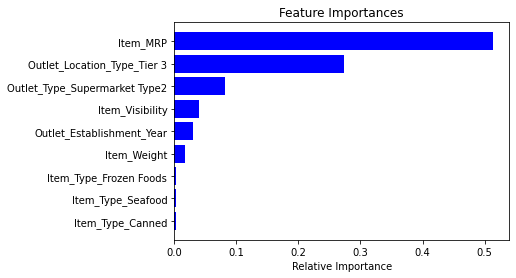

In [165]:
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
from sklearn.feature_selection import SelectFromModel

In [0]:
feature = SelectFromModel(model)

In [168]:
feature

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=10,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False, random_state=1,
                                                verbose=0, warm_start=False),
                max_features=None, no

In [0]:
Fit = feature.fit_transform(X, y)

In [175]:
Fit.tolist()

[[0.016047301, 249.8092, 1999.0, 0.0, 0.0],
 [0.019278216, 48.2692, 2009.0, 0.0, 0.0],
 [0.016760075, 141.618, 1999.0, 0.0, 0.0],
 [0.0, 182.095, 1998.0, 1.0, 0.0],
 [0.0, 53.8614, 1987.0, 0.0, 0.0],
 [0.0, 51.4008, 2009.0, 0.0, 0.0],
 [0.012741088999999999, 57.6588, 1987.0, 0.0, 0.0],
 [0.127469857, 107.7622, 1985.0, 0.0, 1.0],
 [0.016687114, 96.9726, 2002.0, 0.0, 0.0],
 [0.09444959, 187.8214, 2007.0, 0.0, 0.0],
 [0.0, 45.5402, 1999.0, 0.0, 0.0],
 [0.045463773, 144.1102, 1997.0, 0.0, 0.0],
 [0.1000135, 145.4786, 1999.0, 0.0, 0.0],
 [0.047257328, 119.6782, 1997.0, 0.0, 0.0],
 [0.06802430000000001, 196.4426, 1987.0, 0.0, 0.0],
 [0.06908896099999999, 56.3614, 1997.0, 0.0, 0.0],
 [0.008596051, 115.3492, 2009.0, 0.0, 0.0],
 [0.06919637599999999, 54.3614, 1999.0, 0.0, 0.0],
 [0.034237682, 113.2834, 1985.0, 0.0, 1.0],
 [0.10249212, 230.5352, 2004.0, 0.0, 0.0],
 [0.138190277, 250.8724, 1987.0, 0.0, 0.0],
 [0.035399923, 144.5444, 1985.0, 0.0, 1.0],
 [0.025698133999999997, 196.5084, 2004.0, 0.0

### Feature Extraction